# 1. Imports

In [102]:
import pandas as pd

#--
import pickle as pkl

#--
import seaborn as sns
import matplotlib.pyplot     as plt
from   matplotlib.gridspec   import GridSpec
from   IPython.display       import Image


from datetime import datetime

# 2. Help Functions | Settings

## 2.1 Settings

In [123]:
sns.set( rc={'figure.figsize' : (25,8)} )

# 3. Data Load

In [4]:
data_raw = pd.read_csv( '../data/ab_testing.csv' )

## 3.1 Initial conversions

In [106]:
data_raw.date = pd.to_datetime( data_raw.date, format = "%Y-%m-%d" )
pkl.dump( data_raw, open( '../models/data_raw.sav', 'wb' )  )

# 4. EDA

## 4.1 Initial exploration

In [8]:
# Análise dos tipos dos dados
data_raw.dtypes

uid                   int64
country              object
gender               object
spent                 int64
purchases             int64
date         datetime64[ns]
group                object
device               object
dtype: object

In [7]:
### Plotagem básica dos dados para melhor compreenção.
display( data_raw.head(5) )
display( data_raw.describe().T )
display( data_raw[['country','gender','group', 'device']].describe().T )
display( f'Testes iniciados {data_raw.date.min().strftime( "%d/%m/%Y" )} e findados {data_raw.date.max().strftime( "%d/%m/%Y" )}' )

,uid,country,gender,spent,purchases,date,group,device
0,11115722,MEX,F,1595,5,2016-03-08,GRP B,I
1,11122053,USA,M,498,2,2017-07-14,GRP B,I
2,11128688,USA,F,2394,6,2017-09-17,GRP A,I
3,11130578,USA,F,1197,3,2017-11-30,GRP A,I
4,11130759,ESP,M,1297,3,2018-01-10,GRP B,A


,count,mean,std,min,25%,50%,75%,max
uid,45883.0,5.544232e+07,2.558679e+07,11115722.0,33395751.5,55312026.0,77535569.0,99999383.0
spent,45883.0,1.883453e+03,1.363922e+03,99.0,897.0,1596.0,2593.0,12170.0
purchases,45883.0,4.544385e+00,3.102454e+00,1.0,2.0,4.0,6.0,30.0


,count,unique,top,freq
country,45883,10,USA,13998
gender,45883,2,M,23116
group,45883,2,GRP A,23009
device,45883,2,A,22982


'Testes iniciados 30/01/2014 e findados 26/01/2018'

#### Algumas informações referentes ao Dataframe    
    Grupo A = Preenchimento automático
    Grupo B = Preenchimento manual
    ---
    Device I = Dispositívos móveis
    Device A = Desktops

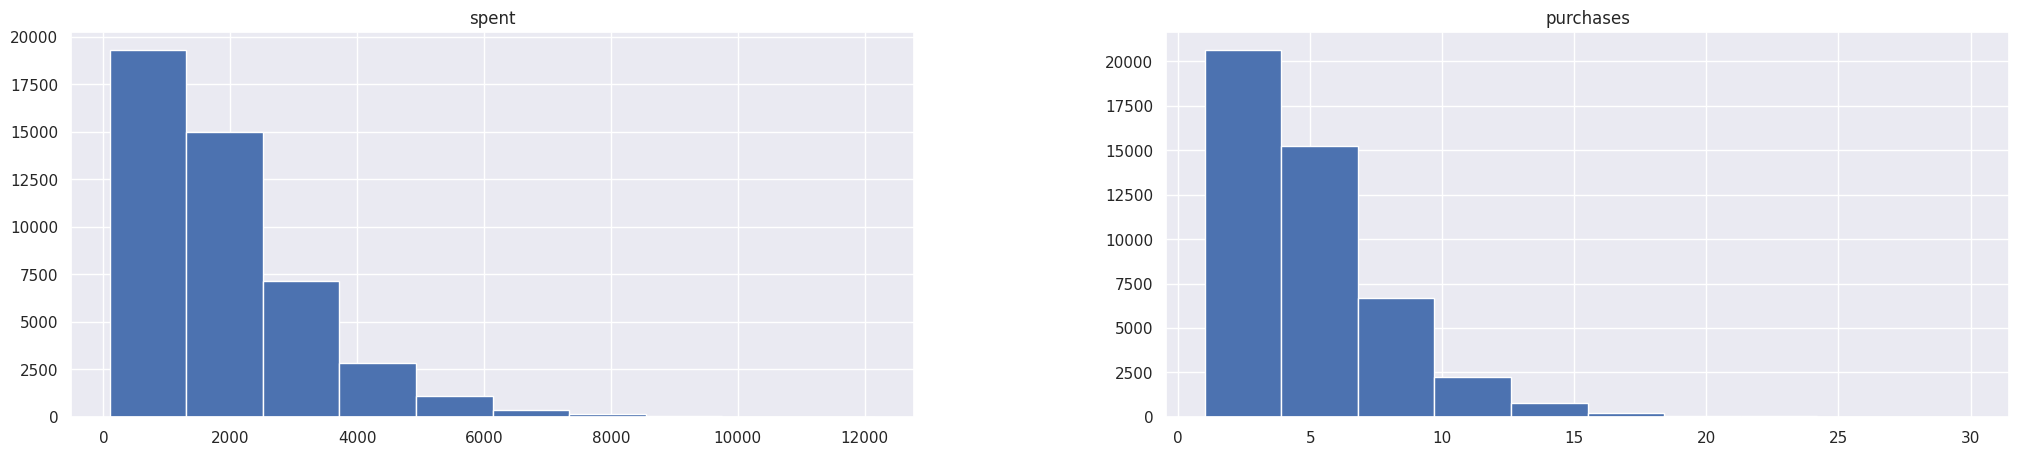

In [9]:
### Plot gráfico em forma de histograma para compreender a distribuição de valores e número de compras
data_raw.drop( columns = ['uid','date'] ).hist( figsize = (25,5) );

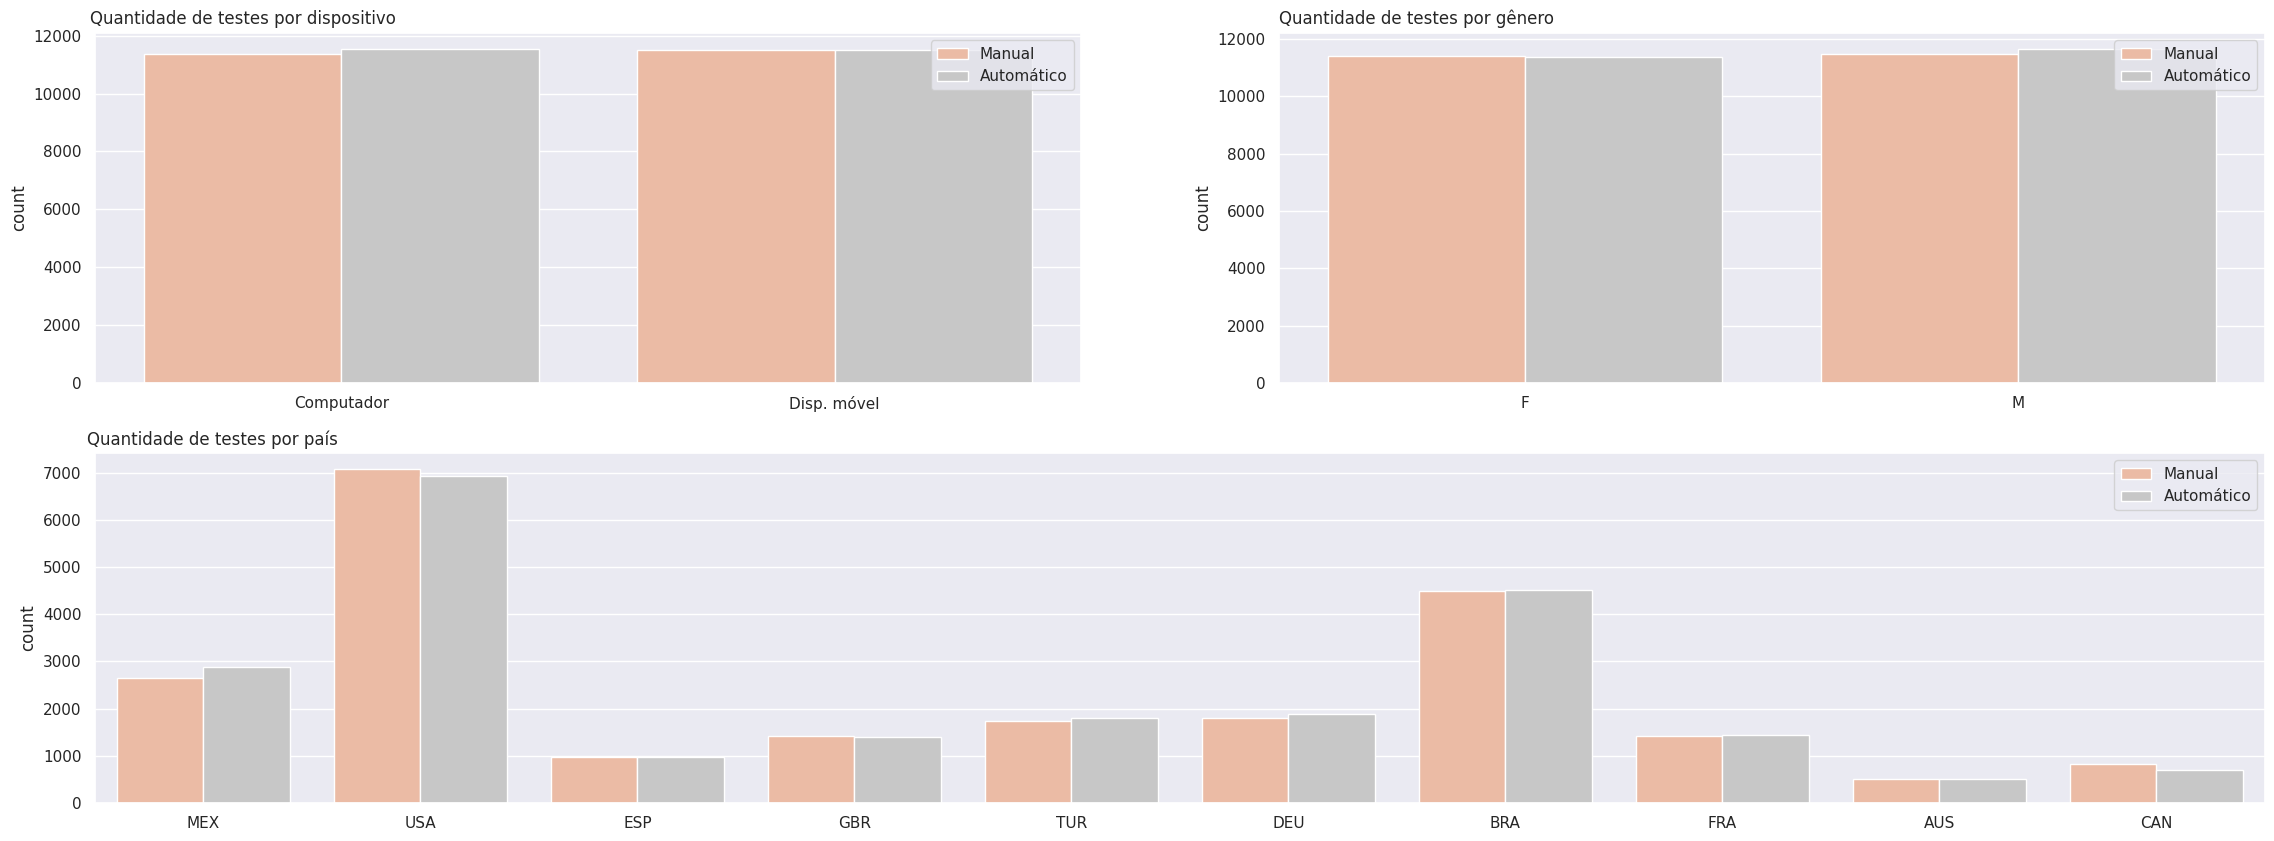

In [124]:
### Plot gráfico dos dados agrupados pelo 'group' para melhor compreenção da distribuição dos dados
sns.set( rc={'figure.figsize' : ( 28,10 )} )
spec = GridSpec( 2,2 )

#First graph
plt.subplot(spec[0,0])

ax = sns.countplot(
    data    = data_raw,
    x       = 'device',
    hue     = 'group', 
    palette = 'RdGy' 
);
ax.set_xticklabels( ['Computador', 'Disp. móvel'] );
plt.legend( ['Manual', 'Automático'] );
plt.title( 'Quantidade de testes por dispositivo', x = 0.15 );
plt.xlabel( None );

#Second graph
plt.subplot(spec[0,1])

sns.countplot(
    data    = data_raw,
    x       = 'gender',
    hue     = 'group', 
    palette = 'RdGy' 
);
plt.legend( ['Manual', 'Automático'] );
plt.title( 'Quantidade de testes por gênero', x = 0.14 );
plt.xlabel( None );

#Third graph
plt.subplot(spec[1,:])

sns.countplot(
    data    = data_raw,
    x       = 'country',
    hue     = 'group', 
    palette = 'RdGy' 
);
plt.legend( ['Manual', 'Automático'] );
plt.title( 'Quantidade de testes por país', x = 0.054 );
plt.xlabel( None );



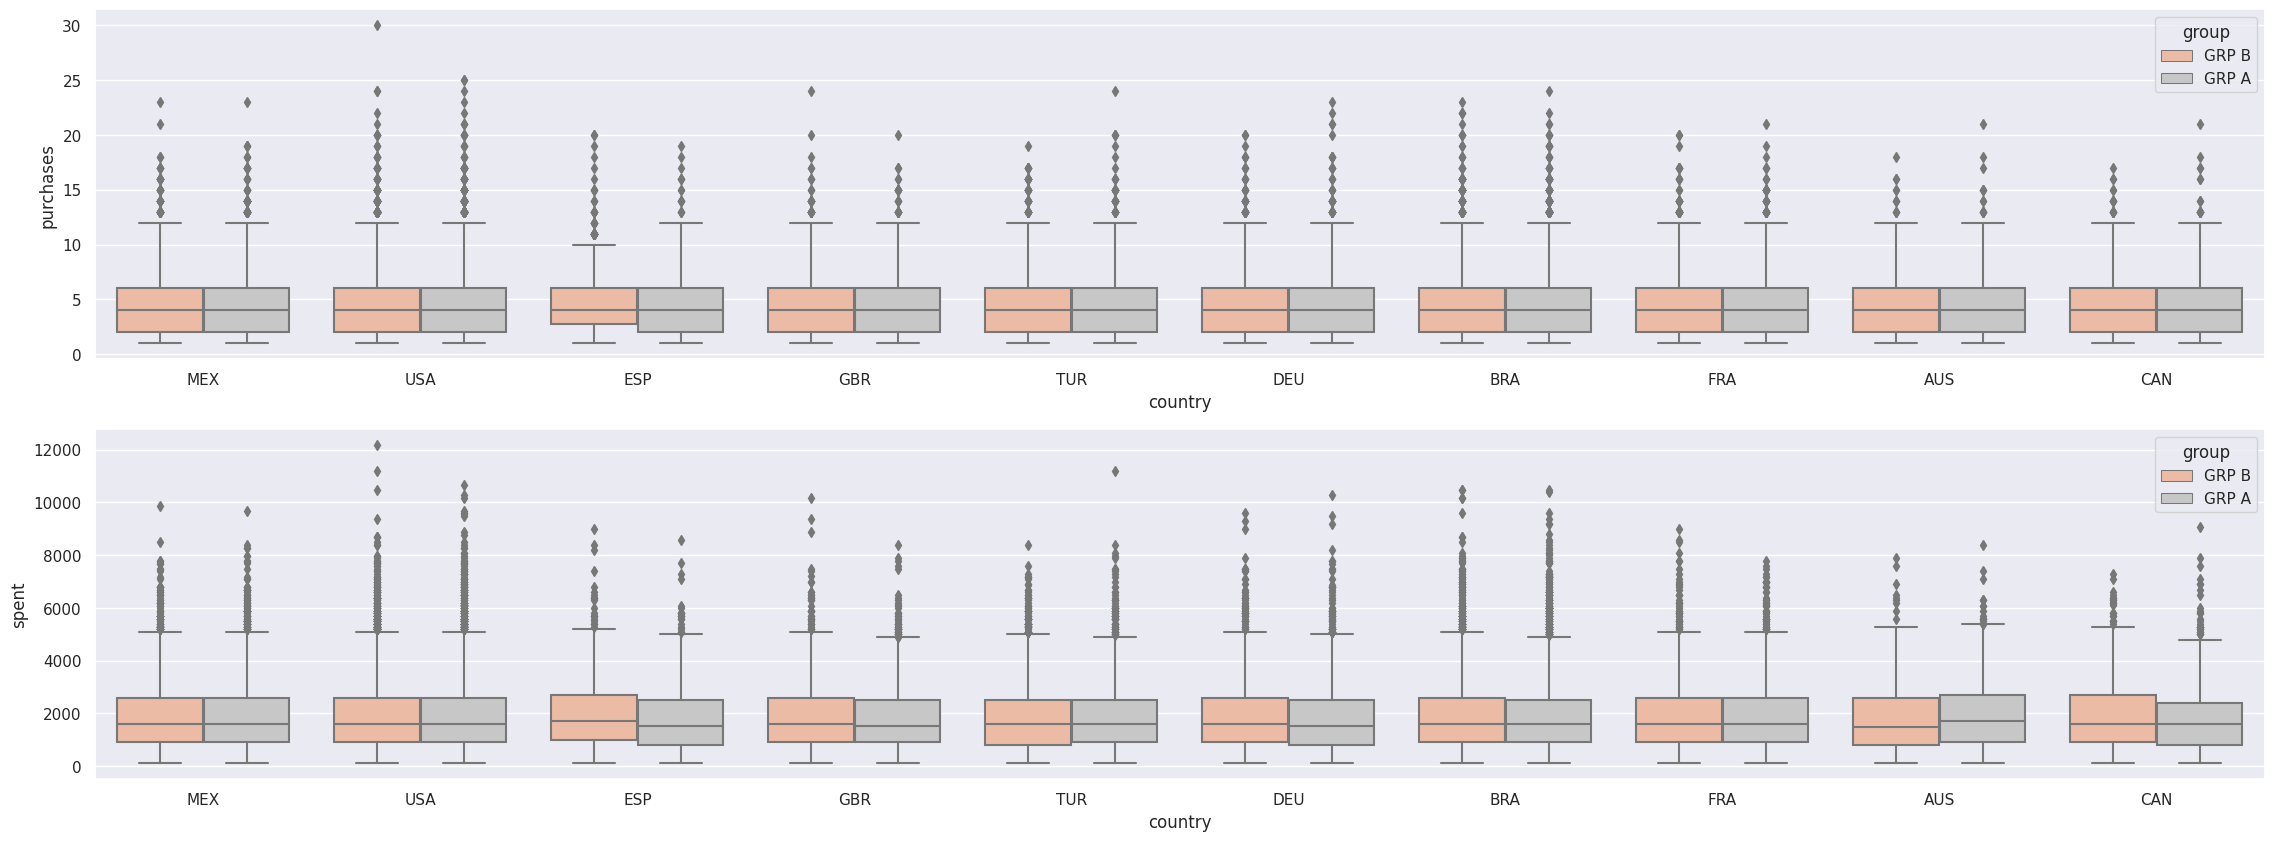

In [126]:
### Distribuição de gastos e compras por país
spec = GridSpec( 2,1 )

plt.subplot(spec[0,0])
sns.boxplot(
    data = data_raw,
    x = 'country',
    y = 'purchases',
    hue = 'group',
    palette = 'RdGy'
)

plt.subplot(spec[1,0])
sns.boxplot(
    data = data_raw,
    x = 'country',
    y = 'spent',
    hue = 'group',
    palette = 'RdGy'
);


    Destaca-se uma MMÍNIMA diferença dentre os grupos em:
    ESP, GBR, DEU, BRA, AUS, CAN. (Mais aparente em CAN e ESP)

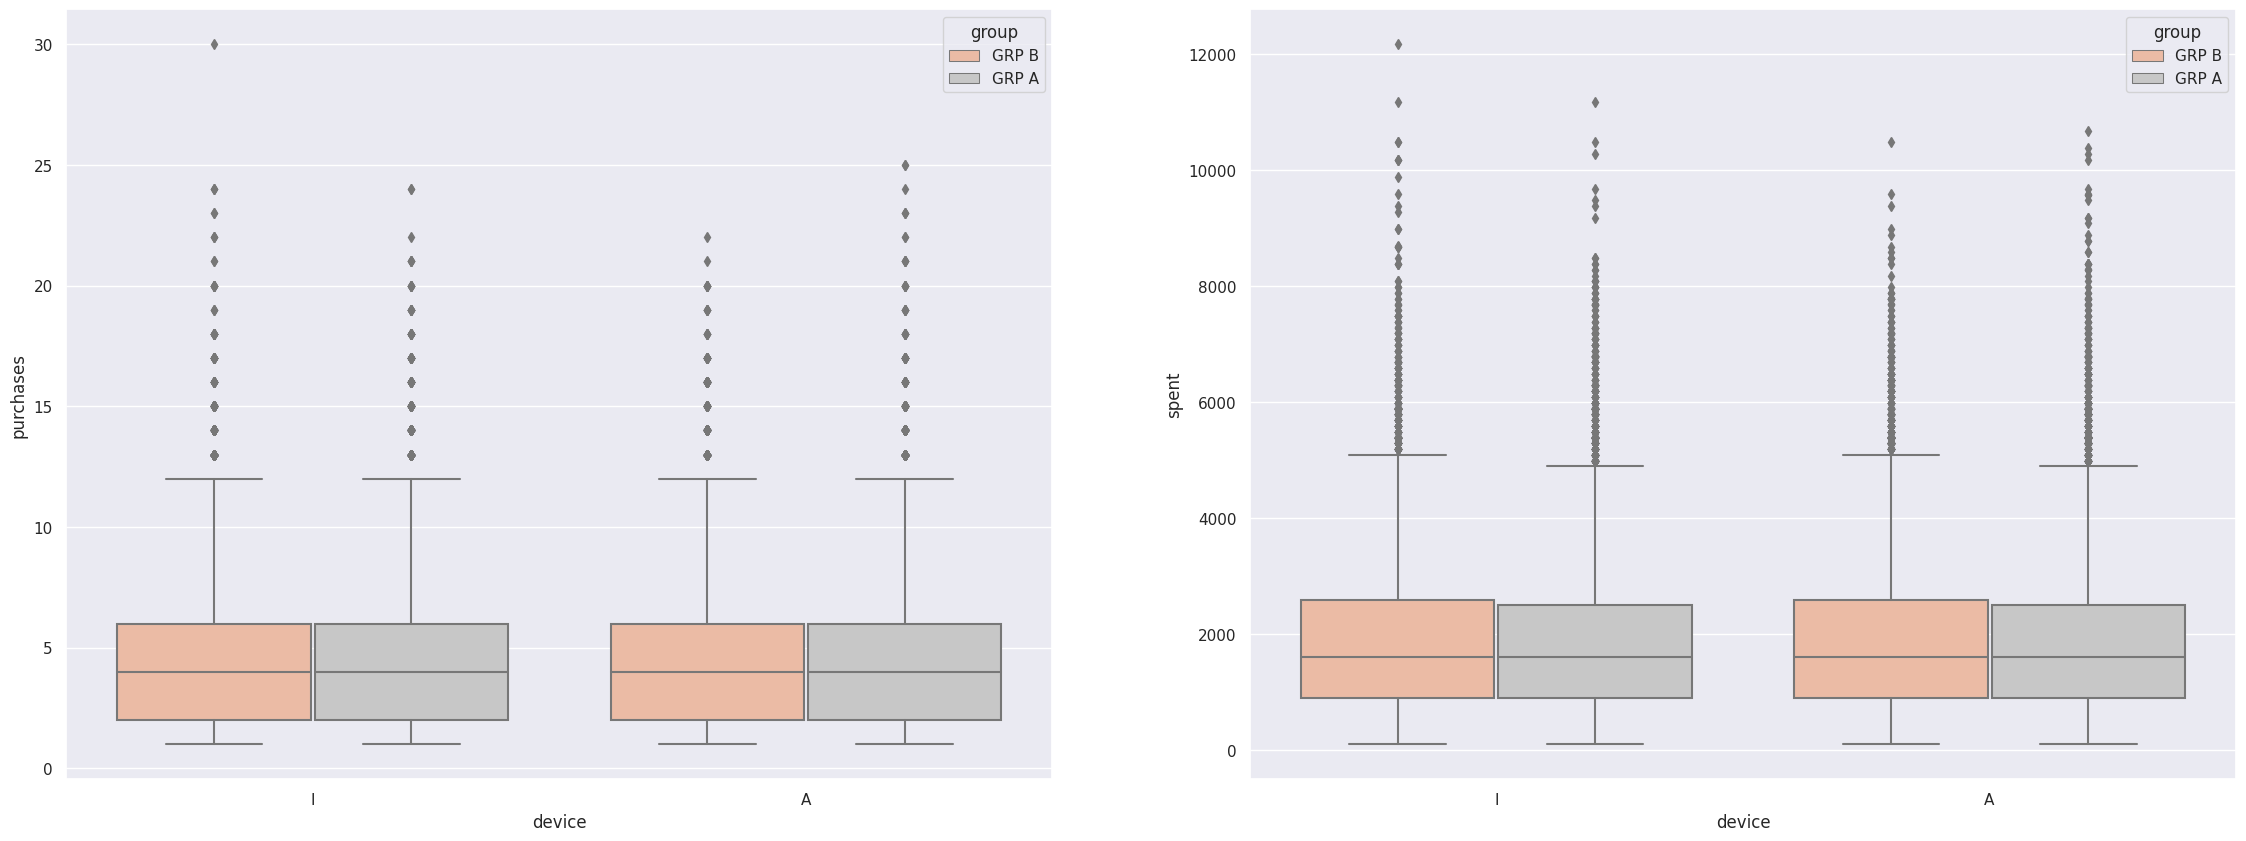

In [127]:
### Distribuição de gastos e compras por dispositivos
spec = GridSpec( 1,2 )

plt.subplot(spec[0,0])
sns.boxplot(
    data = data_raw,
    x = 'device',
    y = 'purchases',
    hue = 'group',
    palette = 'RdGy'
)

plt.subplot(spec[0,1])
sns.boxplot(
    data = data_raw,
    x = 'device',
    y = 'spent',
    hue = 'group',
    palette = 'RdGy'
);

    Em spent, destaca-se mínima diferênça em ambos dispositivos no gtrupo B (tratamento)

### Considerações
    Como a distibuição de quantidade por variáveis quanto os gastos ( spent & purchases ) se mostra muito próximos, a análise exploratória dos dados se mostra, de maneira geral, praticamente inconclusiva. Evidenciando a necessidade de uma granularização mais profunda em próximos cíclos.